# Maestría en Física Médica - Taller de Informática


# NumPy - Avanzado



## Copias y vistas

Al operar y manipular arrays, sus datos a veces se copian en un nuevo array y otras veces no. Esto puede ser muy confuso. Hay tres casos:

#### Las asignaciones simples no hacen copia del array

In [1]:
import numpy as np

In [2]:
A = np.arange(12)
print(A)
B = A            # No se crea un array nuevo
B is A           # A y B son dos nombres para el mismo array

[ 0  1  2  3  4  5  6  7  8  9 10 11]


True

In [3]:
B.shape = 3,4    # por ejemplo, cambiarle la forma a B, le cambia la forma a A
A.shape
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [4]:
B[0,:] = 80

print(A)

[[80 80 80 80]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Python pasa arrays 'como referencia', por lo que las llamadas a funciones no hacen copia.

In [5]:
def f(X):
    '''
    Una función que espera un array X y cambia X[0] a 2.0
    '''
    X[0] = 2.0
    

A = np.ones([4,5])   # <--- array de unos, de 4 filas y 5 columnas

print('Antes de llamar a la función:', A[0])          # <--- imprimo la primer fila

f(A)

print('Luego de llamar a la función:', A[0])                        

Antes de llamar a la función: [1. 1. 1. 1. 1.]
Luego de llamar a la función: [2. 2. 2. 2. 2.]


#### Vistas. 
Diferentes arrays pueden compartir los mismos datos. El método de view crea un nuevo array que "mira" los mismos datos.

In [6]:
print(A)
C = A.view()
C is A

[[2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


False

In [7]:
C.shape = 2,6                      # Cambiar la forma de C, no cambia la de A
print(C)
A.shape

ValueError: cannot reshape array of size 20 into shape (2,6)

In [8]:
C[0,:] = 3.0                         # Pero cambiar los datos de C, cambia los datos de A
A

array([[3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Hacer un slicing de un array devuelve una vista:

In [9]:
S = A[1:3]     
S[:] = 10           
A

array([[ 3.,  3.,  3.,  3.,  3.],
       [10., 10., 10., 10., 10.],
       [10., 10., 10., 10., 10.],
       [ 1.,  1.,  1.,  1.,  1.]])

#### Copia

In [10]:
D = A.copy()                          # se crea un nuevo array y se copian los datos
D is A

False

In [11]:
D[0] = 23
print(D)
print(A)

[[23. 23. 23. 23. 23.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  1.]]
[[ 3.  3.  3.  3.  3.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [ 1.  1.  1.  1.  1.]]


## Indexado (más sofisticado)

NumPy ofrece más técnicas de indexación que las secuencias regulares de Python. Además de indexar por enteros y sectores, como vimos anteriormente, los arrays pueden indexarse mediante arrays de enteros y arrays lógicos.


### Indexado con un array de índices¶

In [12]:
import numpy as np

In [13]:
A = np.arange(12)**2                       # array de cuadrados de los números del 0 al 11
print(A)

I = np.array([1, 1, 3, 8, 5])              # array de índices

A[I]                                       # Los elementos de A en las posiciones dada por I                         

[  0   1   4   9  16  25  36  49  64  81 100 121]


array([ 1,  1,  9, 64, 25])

In [14]:
J = np.array([[3, 4], [9, 7]])      # array bidimensional de índices

A[J]                                # <--- con la misma forma que J

array([[ 9, 16],
       [81, 49]])

Cuando el array indexado es multidimensional, un array de índices se refiere a la primera dimensión del array indexado.

El siguiente ejemplo muestra este comportamiento al convertir una imagen 'grayscale' en una imagen 'truecolor' (o RGB) usando una paleta.

In [15]:
paleta = np.array( [ [0.0, 0.0, 0.0],              # negro
                      [1.0, 0.0, 0.0],             # rojo
                      [0.0, 1.0, 0.0],             # verde
                      [0.0, 0.0, 1.0],             # azul
                      [1.0, 1.0, 1.0] ] )          # blanco

imagen = np.array([[ 0, 1, 2, 0 ],           # cada valor, sirve como indice en el mapa de colores (paleta)
                   [ 0, 3, 4, 0 ]])

print(imagen.shape)
print(paleta[imagen].shape)                         

(2, 4)
(2, 4, 3)


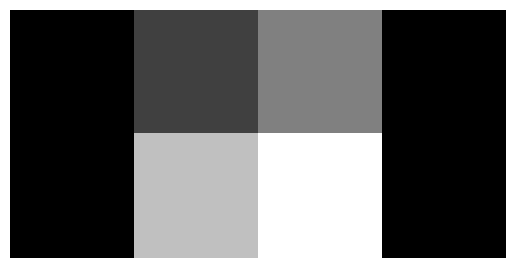

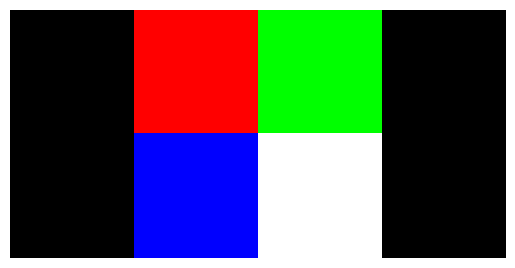

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagen, cmap = 'gray')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(paleta[imagen], cmap = 'gray')
plt.axis('off')
plt.show()

También podemos proporcionar índices para más de una dimensión. Los arrays de índices para cada dimensión deben tener la misma forma.

In [17]:
A = np.arange(12).reshape(3,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
I = np.array([[0,1],                        # Índices para la primera dimesión de A
              [1,2]])

J = np.array([[2,1],                        # Índices para la segunda dimesión de A
              [3,3]])

A[I,J]                                      # I y J deben tener la misma forma

array([[ 2,  5],
       [ 7, 11]])

In [19]:
A[I,2]

array([[ 2,  6],
       [ 6, 10]])

In [20]:
A[:,J]                                     

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

Podemos poner I y J en una lista y luego hacer la indexación con la lista

In [21]:
L = [I,J]
print(L)

A[L]                                       # equivalente a A[I,J]

[array([[0, 1],
       [1, 2]]), array([[2, 1],
       [3, 3]])]


IndexError: index 3 is out of bounds for axis 0 with size 3

Sin embargo, no podemos hacer esto poniendo I y J en un array, ya que este array se interpretará como indexando la primera dimensión de A.

In [22]:
S = np.array([I,J])
print(S)

A[S]                                       # No es lo mismo que lo visto arriba

[[[0 1]
  [1 2]]

 [[2 1]
  [3 3]]]


IndexError: index 3 is out of bounds for axis 0 with size 3

In [23]:
A[tuple(S)]                                # lo mismo que A[I,J]

array([[ 2,  5],
       [ 7, 11]])

Otro ejemplo de indexación con arrays de índices, es la búsqueda del valor máximo de series dependientes del tiempo:

In [24]:
time = np.linspace(20, 145, 5)                 # array arbitrario que simula el tiempo    
data = np.random.random((5,4))                 # 4 series arbitrarias (columnas) que simulan depender del tiempo

print(time)

print(data)

[ 20.    51.25  82.5  113.75 145.  ]
[[0.34149156 0.80363754 0.08082892 0.23118508]
 [0.71645622 0.18990364 0.17773766 0.23002342]
 [0.53981136 0.84160838 0.54074828 0.97992064]
 [0.22738407 0.7031067  0.21860996 0.5603983 ]
 [0.91289145 0.13788501 0.31327044 0.56987913]]


In [25]:
ind = data.argmax(axis=0)                   # índices de los máximos para cada columna
ind

array([4, 2, 2, 2])

In [26]:
time_max = time[ind]                        # tiempos correspondientes al máximo 
data_max = data[ind, range(data.shape[1])]  # => data[ind[0],0], data[ind[1],1]...

print(time_max)

print(data_max)

[145.   82.5  82.5  82.5]
[0.91289145 0.84160838 0.54074828 0.97992064]


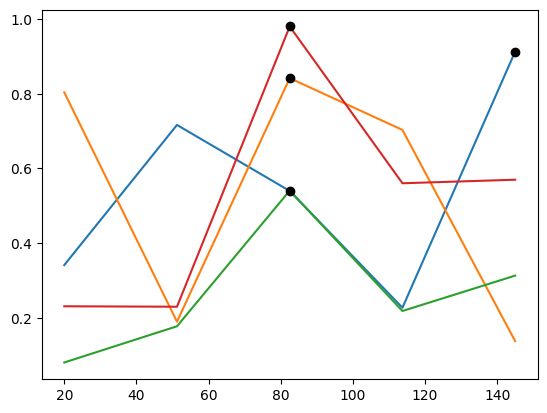

In [27]:
# graficando los resultados...

plt.figure()
plt.plot(time, data)
plt.plot(time_max, data_max, 'ok')
plt.show()

También puede usar la indexación para asignar valores a arrays:

In [28]:
A = np.arange(5)
A

array([0, 1, 2, 3, 4])

In [29]:
A[[1,3,4]] = 0
A

array([0, 0, 2, 0, 0])

Sin embargo, cuando la lista de índices contiene repeticiones, la asignación se realiza varias veces, pisando el último valor:

In [30]:
A = np.arange(5)
A

array([0, 1, 2, 3, 4])

In [31]:
A[[0,0,2]] = [1,2,3]
A

array([2, 1, 3, 3, 4])

### Indexado lógico

In [32]:
A = np.arange(12).reshape(3,4)
B = A > 4

print(A)
print(B)                                          # B es un array lógico de las mismas forma de A

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]


In [33]:
A[B]                                       # array 1D con los elementos de A donde B es True

array([ 5,  6,  7,  8,  9, 10, 11])

Esto es muy util para hacer asignaciones basados en un criterio:

In [34]:
A[B] = 0                                   # Esto hace cero todos los elementos de A que son mayores a 4
A

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

Como ejemplo, de indexado lógico, trataremos de segmentar el "tejido blando" de un fantoma:

In [35]:
import matplotlib.pyplot as plt

I = plt.imread('./Data/cirs_slice.png')[...,0]


plt.figure(figsize = (6,6))
plt.imshow(I, cmap = 'gray')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './Data/cirs_slice.png'

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

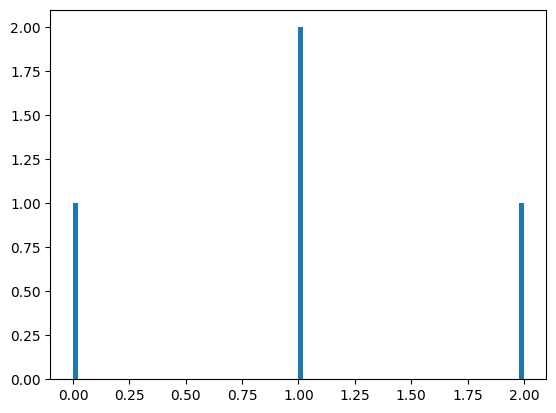

In [36]:
plt.figure()
plt.hist(I.ravel(), bins=100, normed=1)       # matplotlib version (plot)
plt.show()

In [37]:
Mask = np.zeros(I.shape)

Mask[(I>0.4) & (I<0.45)] = 1 #usar 0.6 y 0.8 para la médula y 0.4 y 0.45 para el tejido blando.¿y para pulmón?

print(Mask.max())
print(Mask.min())

0.0
0.0


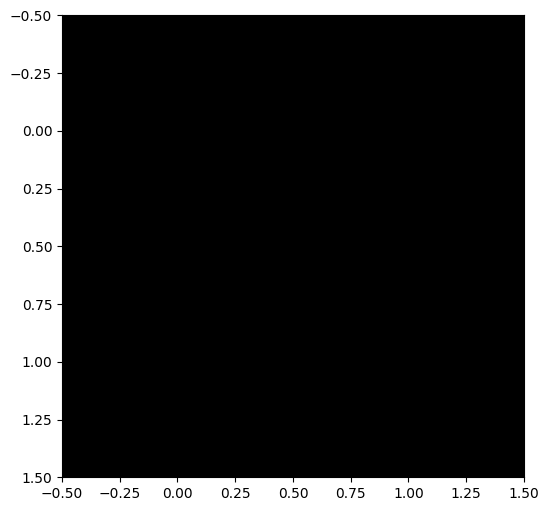

In [38]:
plt.figure(figsize = (6,6))
plt.imshow(Mask, cmap = 'gray')
plt.show()

In [39]:
red_mask = np.dstack([Mask, np.zeros_like(Mask), np.zeros_like(Mask)])

print(red_mask.shape)

(2, 2, 3)


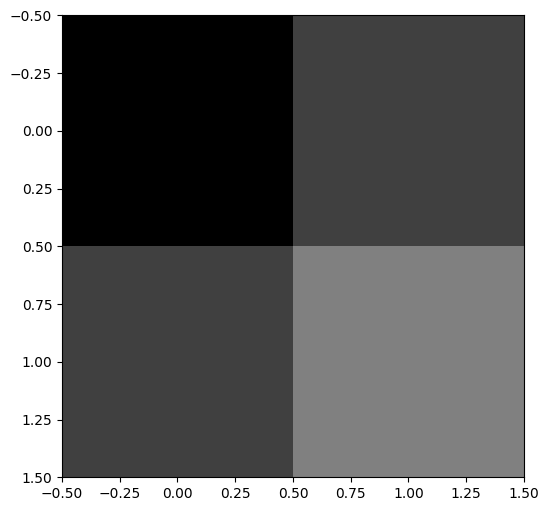

In [40]:

plt.figure(figsize = (6,6))
plt.imshow(I, cmap = 'gray')
plt.imshow(red_mask, alpha = 0.5, cmap = 'gray')
plt.show()


## Un poco de IO

### De y hacia texto

In [41]:
data = np.loadtxt('./Data/ejemplo_texto_tabla.txt', delimiter = ',', skiprows = 7)
data.shape

FileNotFoundError: ./Data/ejemplo_texto_tabla.txt not found.

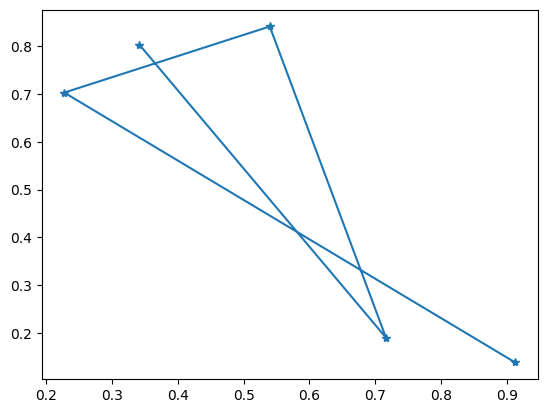

In [42]:
plt.figure()
plt.plot(data[:,0], data[:,1], '-*')
plt.show()

(5,)


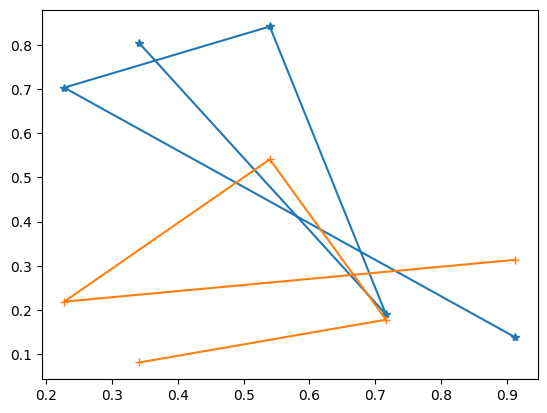

In [43]:
z = -np.cos(data[:,0])

print(z.shape)

nueva_data = np.concatenate([data, z[:,np.newaxis]], axis = 1)

plt.figure()
plt.plot(nueva_data[:,0], nueva_data[:,1], '-*')
plt.plot(nueva_data[:,0], nueva_data[:,2], '-+')
plt.show()

In [44]:
mi_header = "Este es un ejemplo de header\ncon más de una línea\n\nx, y, z\n\n"

np.savetxt('otro_ejemplo.txt', nueva_data, delimiter=',', header = mi_header) 

### Formatos propios

In [45]:
X = np.ones((3, 3))

np.save('mi_array.npy', X)

In [46]:
X2 = np.load('mi_array.npy')

print(X2)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [47]:
Y = 2*X
Z = Y + 23

np.savez('mis_arrays.npz', a = X, b = Y, c = Z)

In [48]:
data = np.load('mis_arrays.npz')

print(data['a'])
print(data['b'])
print(data['c'])

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
[[25. 25. 25.]
 [25. 25. 25.]
 [25. 25. 25.]]
